In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
import math
import scipy
import itertools
import operator
from sympy import *
import sys

In [65]:
# Sampling a t from an exponential distribution
lam = 3
exp_dist = random.exponential(lam, size=5) #This provides a vector with the size representing the number of elements in the list
sample_t = 10 * exp_dist.round() # Rounding the samples to the nearest integer then multiplying by 10
sample_t = np.insert(sample_t, 0, 0) # Inserting 0 in the sample t at the beginning to indicate the starting point
total_sample_t = np.array(list(itertools.accumulate(sample_t))) # Accumulating the samples of t to create a t that is ...
# ... continuously increasing over time

print(total_sample_t, sample_t)

[  0.  20.  60.  70. 130. 180.] [ 0. 20. 40. 10. 60. 50.]


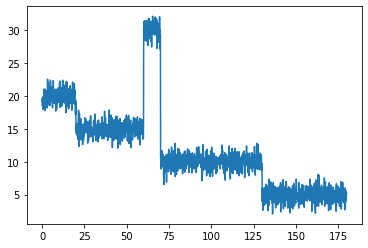

In [66]:
mean = [20, 15, 30, 10, 5] # Instantiating the mean values
deviation = 1 # Instantiating the standard deviation
dt = .1
t = np.arange(0, total_sample_t[-1], dt) # Creating a t that is increasing over time with constant intervals
y = np.array([]) # Instantiating a y array
temp = []
i = 0

# Creating a loop that populates y
while i < len(mean):
    sample_size = int(((total_sample_t[i+1] - total_sample_t[i]) / dt).round()) # Creating a sample size to determine the size...
    # ...that will be used in the normal distribution to populate y
    temp = np.random.normal(loc = mean[i], scale = deviation, size = sample_size) # Sampling from a normal distribution with ...
    # ... a specified mean and a constant standard deviation
    y = (np.append(y, temp)).flatten() # Populating y with the samples from the normal distribution
    i = i + 1
    
plt.plot(t, y)

In [67]:
K = 1
J = []
prev_min_value = 1000000
i = 0
#np.set_printoptions(threshold=sys.maxsize)

# Using a while loop to calculate the BIC and the locations at which the change point occurs: AKA the BIC Algorithm
while(True):
    
    BIC = []
    for i in range(1, len(y)):
        potential_point = i
        if (i not in J):
            # Setting up a temporary list with the same values as J to make it easier to work with J values within this loop
            temp_J = J.copy()
            temp_J.append(i)
            temp_J.sort()
            
            # Finding the number of data points in between each change point
            n = []
            temp_J.append(len(y))
            i = 0
            for i in range(len(temp_J)):
                if (i != 0):
                    
                    val = temp_J[i] - temp_J[i - 1]
                    n.append(val)
                else:
                    n.append(temp_J[i])     
            temp_J.pop()
            
            # Finding the variance from the location points, J
            variance = []
            newtemp = []
            newtemp.append(0)
            newtemp = newtemp + temp_J
            newtemp.append(len(y))
            i = 0
            for i in range(len(n)): # This loop is using the equation for variance
                w = 0
                w2 = 0
                j = 0
                for j in range(int(newtemp[i]), int(newtemp[i+1])):
                    w = w + y[j]
                    w2 = w2 + y[j]**2
                pt1 = w2 / n[i]
                pt2 = (w**2) / (n[i]**2)
                var = pt1 - pt2 
                variance.append(var)
            # Calculating S in order to find the BIC     
            S = 0
            i = 0
            for i in range(len(n)):
                S = S + n[i] * variance[i]
                
            # Finding the values of the BIC    
            N = len(y)
            BIC_eval = N * log(S) + K * log(N)
            BIC.append(BIC_eval.evalf())
            
    min_BIC = BIC.index(min(BIC)) # Finding the index where the minimum BIC occurs which indicates where the changepoint occurs
    # If the BIC
    if min(BIC) <= prev_min_value: 
        print("--> changepoint: ", min_BIC)
        
        prev_min_value = min(BIC) # Update the new threshold
        J.append(min_BIC) # Put the index where the smallest BIC possible occurs into the location, J.
        K += 1
    else:
        print("best K: ", (K))
        break
print(J)

--> changepoint:  699
--> changepoint:  599
--> changepoint:  1297
--> changepoint:  199
--> changepoint:  696
best K:  6
[699, 599, 1297, 199, 696]


The locations where change points occur: [69.9, 59.900000000000006, 129.70000000000002, 19.900000000000002, 69.60000000000001]


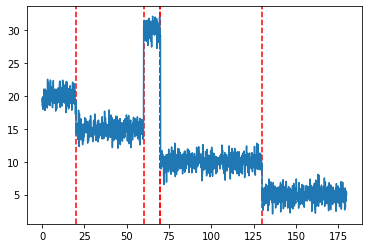

In [68]:
location = [] # The value of the change_points
for i in range(len(J)):
    location.append(t[J[i]]) # Since J provides the index at which the lowest BIC occurs, this means that I need to use J[i]...
    # ... as the index for t, because J in this case only represents the number of data points until that changepoint...
    # ... is reached. So, in order to find the actual time, t, that the change point occurs I need to plug J[i] into t.
    locations = t[J[i]] # This is the same reasoning as above. Except I am only using 'locations' to graph my vertical lines...
    # ... to plot that one line and it can move onto the next vertical line
    plt.axvline(x = locations, linestyle = '--', color = 'r')

print("The locations where change points occur:", location)
plt.plot(t, y)

In [69]:
# Creating a new temporary list to later help define my final and starting points for my means and standard deviations
temp = [0]
temp = temp + J
temp.append(len(y))
temp.sort()

# Instantiating the mean, standard deviation, and the difference between the change points to get their distance from each other
predicted_mean = []
curr_mean = 0
predicted_std = []
curr_std = 0
difference = []
i = 0

# Creating a loop to find my mean, standard deviation, and difference
for i in range(len(temp) - 1):
    initial = temp[i]
    final = temp[i+1]
    
    differences = final - initial # Finding the difference between the starting point and where the change point occurs
    difference.append(differences)
    
    curr_mean = np.mean(y[initial : final]) # Finding the mean between the starting point and where the change point occurs
    predicted_mean.append(curr_mean)
    
    curr_std = np.std(y[initial : final])#Finding the standard dev. between the starting point and where the change point occurs
    predicted_std.append(curr_std)

std = np.mean(predicted_std) # Calculating the average standard deviation across the entire time  

print("The estimated mean values:", list(np.around(np.array(predicted_mean), 3)))
print("The actual mean values:", mean)
print()
print("The estimated standard deviation:", std)
print("The actual standard deviation:", deviation)

The estimated mean values: [19.938, 14.949, 29.777, 29.353, 10.052, 4.916]
The actual mean values: [20, 15, 30, 10, 5]

The estimated standard deviation: 1.1499280429638012
The actual standard deviation: 1


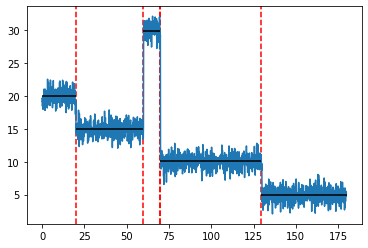

In [70]:
i = 0 
x_min = 0
x_max = 0
# Creating a loop that will reiterate to plot the calculated means against my actual data
for i in range(len(difference)):
    x_max = x_max + t[difference[i]]
    plt.hlines(y = predicted_mean[i], xmin = x_min, xmax = x_max, color = 'black', zorder = 10)
    x_min = x_min + t[difference[i]]
    
# Recreating the vertical lines which indicate where the change points occur    
for i in range(len(J)):
    location.append(t[J[i]])
    locations = t[J[i]]
    plt.axvline(x = locations, linestyle = '--', color = 'r')
  
plt.plot(t, y)

In [ ]:
# Overall, the estimated mean values that I calculated were very close to the mean values that I specified. This also goes
# for the standard deviation as well. Additionally, when you plot the calculated mean values against the actual data, as can
# be seen above, you can see that the calculated mean is right in the middle between the data points. What this indicates is
# that my calculated mean values are proven to be the average of the data point values.